In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
import sqlite3

In [19]:
df = pd.read_csv("Dataset.csv")
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA",22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",9


In [21]:
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'month', 'total_sales', 'city', 'hour'],
      dtype='object')

In [22]:
for column in df.columns:
  print(column)

order_id
product
quantity_ordered
price_each
order_date
purchase_address
month
total_sales
city
hour


In [25]:
df.dtypes

,0
order_id,int64
product,object
quantity_ordered,int64
price_each,float64
order_date,object
purchase_address,object
month,object
total_sales,float64
city,object
hour,int64


In [26]:
df.isnull().sum()

,0
order_id,0
product,0
quantity_ordered,0
price_each,0
order_date,0
purchase_address,0
month,0
total_sales,0
city,0
hour,0


In [28]:
df.describe()

,order_id,quantity_ordered,price_each,total_sales,hour
count,182735.000000,182735.000000,182735.000000,182735.000000,182735.000000
mean,230533.878463,1.124333,184.315392,185.403890,14.413019
std,51543.205104,0.442937,332.684344,332.877445,5.425390
min,141234.000000,1.000000,2.990000,2.990000,0.000000
25%,185954.500000,1.000000,11.950000,11.950000,11.000000
50%,230485.000000,1.000000,14.950000,14.950000,15.000000
75%,275220.500000,1.000000,150.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,3400.000000,23.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182735 entries, 0 to 182734
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          182735 non-null  int64  
 1   product           182735 non-null  object 
 2   quantity_ordered  182735 non-null  int64  
 3   price_each        182735 non-null  float64
 4   order_date        182735 non-null  object 
 5   purchase_address  182735 non-null  object 
 6   month             182735 non-null  object 
 7   total_sales       182735 non-null  float64
 8   city              182735 non-null  object 
 9   hour              182735 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 13.9+ MB


In [30]:
len(df.columns)

10

In [31]:
df.shape

(182735, 10)

In [32]:
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'month', 'total_sales', 'city', 'hour'],
      dtype='object')

In [34]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA",22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",9


In [41]:
df['order_date'] = pd.to_datetime(df.order_date)

In [42]:
df.dtypes

,0
order_id,int64
product,object
quantity_ordered,int64
price_each,float64
order_date,datetime64[ns]
purchase_address,object
month,object
total_sales,float64
city,object
hour,int64


In [43]:
df1 = df[['product', 'quantity_ordered', 'price_each', 'total_sales']]


In [44]:
df1.head()

,product,quantity_ordered,price_each,total_sales
0,USB-C Charging Cable,2,11.95,23.90
1,Bose SoundSport Headphones,1,99.99,99.99
2,Google Phone,1,600.00,600.00
3,Wired Headphones,1,11.99,11.99
4,Wired Headphones,1,11.99,11.99


In [45]:
df1.dropna()

,product,quantity_ordered,price_each,total_sales
0,USB-C Charging Cable,2,11.95,23.90
1,Bose SoundSport Headphones,1,99.99,99.99
2,Google Phone,1,600.00,600.00
3,Wired Headphones,1,11.99,11.99
4,Wired Headphones,1,11.99,11.99
...,...,...,...,...
182730,AAA Batteries (4-pack),3,2.99,8.97
182731,iPhone,1,700.00,700.00
182732,iPhone,1,700.00,700.00
182733,34in Ultrawide Monitor,1,379.99,379.99


In [46]:
df1.dropna(inplace = True)

In [47]:

df1.rename(columns={
    'quantity_ordered': 'quantity',
    'price_each': 'price',
}, inplace=True)

In [54]:
df1.head()

,product,quantity,price,total_sales
0,USB-C Charging Cable,2,11.95,23.90
1,Bose SoundSport Headphones,1,99.99,99.99
2,Google Phone,1,600.00,600.00
3,Wired Headphones,1,11.99,11.99
4,Wired Headphones,1,11.99,11.99


In [55]:
df1['quantity'] = df1['quantity'].astype(int)
df1['price'] = df1['price'].astype(float)
df1['total_sales'] = df1['total_sales'].astype(float)

In [56]:
conn = sqlite3.connect('sales_data.db')
df1.to_sql("sales", conn, if_exists='replace', index=False)



182735

In [57]:
query = "SELECT * FROM sales"
df_summary = pd.read_sql(query, conn)
print(df_summary.head())

                      product  quantity   price  total_sales
0        USB-C Charging Cable         2   11.95        23.90
1  Bose SoundSport Headphones         1   99.99        99.99
2                Google Phone         1  600.00       600.00
3            Wired Headphones         1   11.99        11.99
4            Wired Headphones         1   11.99        11.99


In [58]:
query = "SELECT product, sum(quantity) FROM sales GROUP BY product"
df_summary = pd.read_sql(query, conn)
print(df_summary)

                       product  sum(quantity)
0                 20in Monitor           4058
1       27in 4K Gaming Monitor           6134
2             27in FHD Monitor           7429
3       34in Ultrawide Monitor           6076
4        AA Batteries (4-pack)          27148
5       AAA Batteries (4-pack)          30487
6     Apple Airpods Headphones          15383
7   Bose SoundSport Headphones          13236
8                Flatscreen TV           4724
9                 Google Phone           5440
10                    LG Dryer            640
11          LG Washing Machine            649
12    Lightning Charging Cable          22841
13          Macbook Pro Laptop           4645
14             ThinkPad Laptop           4054
15        USB-C Charging Cable          23555
16             Vareebadd Phone           2023
17            Wired Headphones          20201
18                      iPhone           6732


In [67]:
query = "SELECT product, sum(quantity) AS total_quantity, sum(price) FROM sales GROUP BY product, quantity "
df_summary = pd.read_sql(query, conn)
print(df_summary)

                       product  total_quantity  sum(price)
0                 20in Monitor            4006   440619.94
1                 20in Monitor              52     2859.74
2       27in 4K Gaming Monitor            6110  2382838.90
3       27in 4K Gaming Monitor              24     4679.88
4             27in FHD Monitor            7343  1101376.57
5             27in FHD Monitor              86     6449.57
6       34in Ultrawide Monitor            6040  2295139.60
7       34in Ultrawide Monitor              36     6839.82
8        AA Batteries (4-pack)           15066    57853.44
9        AA Batteries (4-pack)            7598    14588.16
10       AA Batteries (4-pack)            3051     3905.28
11       AA Batteries (4-pack)             988      948.48
12       AA Batteries (4-pack)             335      257.28
13       AA Batteries (4-pack)              96       61.44
14       AA Batteries (4-pack)              14        7.68
15      AAA Batteries (4-pack)           13503    40373.

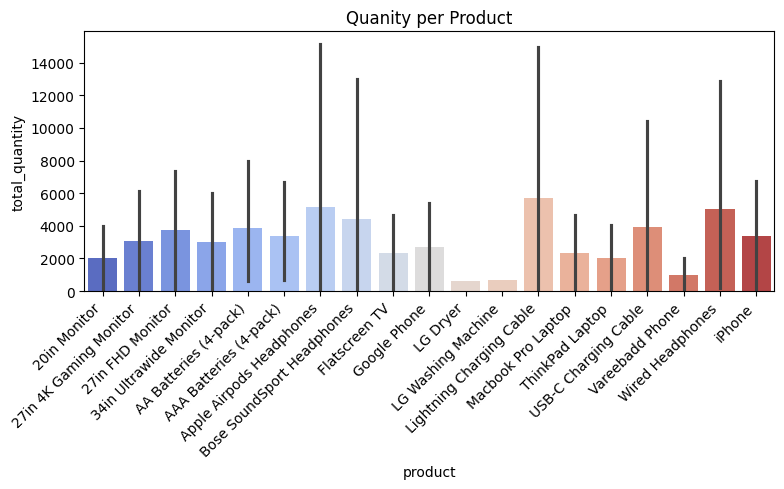

In [68]:
plt.figure(figsize =(8,5))
sns.barplot(x="product", y ="total_quantity", data =df_summary, palette ="coolwarm")
plt.title("Quanity per Product")
plt.ylabel("total_quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Revenue_per_Product.png")
plt.show()

In [83]:
query = "SELECT product, sum(quantity), sum(total_sales) AS Total_Revenue FROM sales GROUP BY product ORDER BY Total_Revenue desc "
df_summary = pd.read_sql(query, conn)
print(df_summary)

                       product  sum(quantity)  Total_Revenue
0           Macbook Pro Laptop           4645     7896500.00
1                       iPhone           6732     4712400.00
2              ThinkPad Laptop           4054     4053959.46
3                 Google Phone           5440     3264000.00
4       27in 4K Gaming Monitor           6134     2392198.66
5       34in Ultrawide Monitor           6076     2308819.24
6     Apple Airpods Headphones          15383     2307450.00
7                Flatscreen TV           4724     1417200.00
8   Bose SoundSport Headphones          13236     1323467.64
9             27in FHD Monitor           7429     1114275.71
10             Vareebadd Phone           2023      809200.00
11                20in Monitor           4058      446339.42
12          LG Washing Machine            649      389400.00
13                    LG Dryer            640      384000.00
14    Lightning Charging Cable          22841      341472.95
15        USB-C Charging

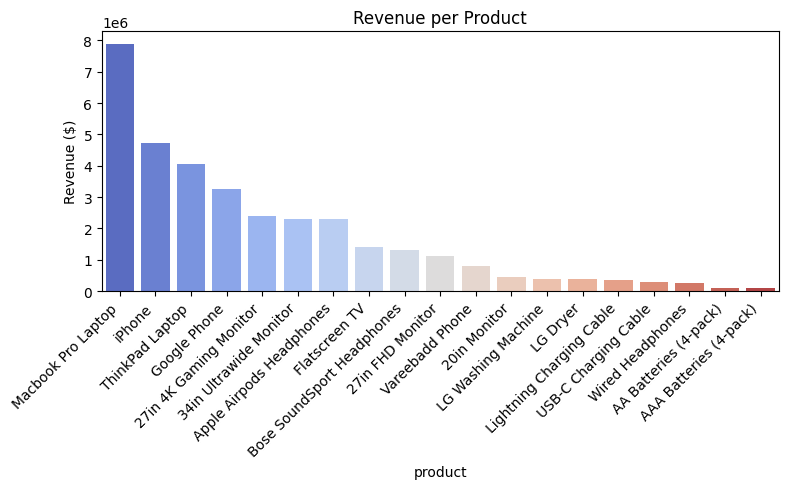

In [66]:
plt.figure(figsize =(8,5))
sns.barplot(x="product", y ="Total_Revenue", data =df_summary, palette ="coolwarm")
plt.title("Revenue per Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Revenue_per_Product.png")
plt.show()

In [69]:
## time based sales analysis
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year

In [73]:
df1.head()

,product,quantity,price,total_sales
0,USB-C Charging Cable,2,11.95,23.90
1,Bose SoundSport Headphones,1,99.99,99.99
2,Google Phone,1,600.00,600.00
3,Wired Headphones,1,11.99,11.99
4,Wired Headphones,1,11.99,11.99


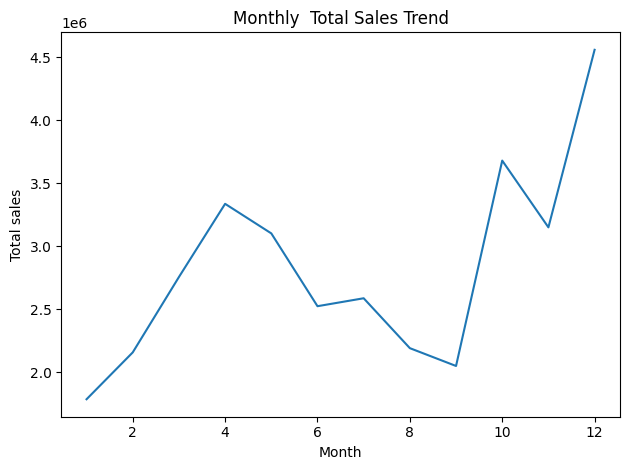

In [75]:
month_sales =df.groupby('month')['total_sales'].sum()
month_sales.plot(kind='line', title="Monthly  Total Sales Trend")
plt.ylabel("Total sales")
plt.xlabel("Month")
plt.tight_layout()
plt.savefig("monthly_sales_trend.png")
plt.show()

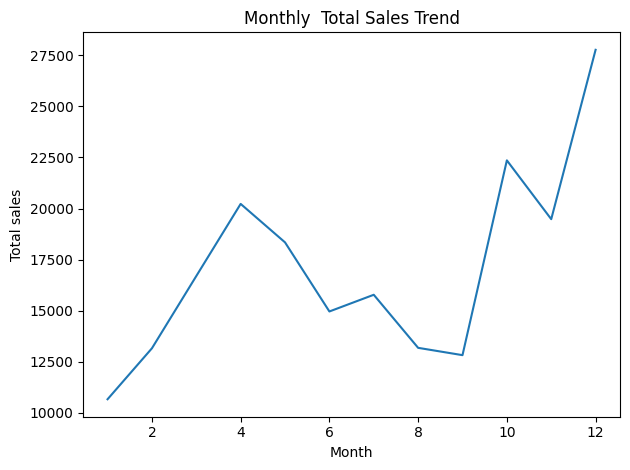

In [79]:
month_sales =df.groupby('month')['quantity_ordered'].sum()
month_sales.plot(kind='line', title="Monthly  Total Sales Trend")
plt.ylabel("Total sales")
plt.xlabel("Month")
plt.tight_layout()
plt.savefig("monthly_sales_trend.png")
plt.show()

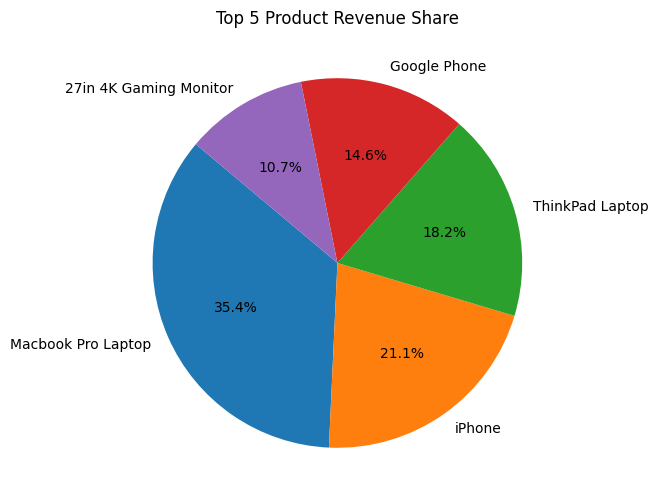

In [84]:
top5 = df_summary.head(5)
plt.figure(figsize=(6, 6))
plt.pie(top5['Total_Revenue'], labels=top5['product'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Product Revenue Share")
plt.savefig("top5_pie.png")
plt.show()

In [85]:
df_summary.to_csv("summary_all_data.csv", index=False)

In [86]:
conn.close()